# ML-8. Metrics learning


В данной задаче мы с вами попробуем кластеризовать покупателей продуктовой компании на основе его персональных данных, таких как состав семьи, доход, вовлеченность в маркетинговые компании, интересы и предпочтения по разным категориям товаров.

In [199]:
#Загрузим библиотеки
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter('ignore')
np.random.seed(42)

In [200]:
# !pip install yellowbrick

 ### Описание данных
 



* **ID**: Идентификационный номер покупателя
* **Year_Birth**: Год рождения покупателя
* **Education**: Степень образования покупателя 
* **Marital_Status**: Семейный  статус покупателя
* **Income**: Годовой доход покупателя
* **Kidhome**: Количество детей до 13 лет, проживающих с покупателем
* **Teenhome**: Количество детей с 13 до 18, проживающих с покупателем
* **Dt_Customer**: Дата регистрации покупателя как клиента компании 
* **Recency**: Количество дней с последней покупки клиента
* **Complain**: Бинарный признак наличия жалоб от клиента в течение двух лет

* **MntWines**: Количество денег, которые клиент потратил на вино за последние два года 
* **MntFruits**: Количество денег, которые клиент потратил на фрукты за последние два года
* **MntMeatProducts**: Количество денег, которые клиент потратил на мясо за последние два года
* **MntFishProducts**: Количество денег, которые клиент потратил на рыбу за последние два года
* **MntSweetProducts**: Количество денег, которые клиент потратил на сладости за последние два года
* **MntGoldProds**: Количество денег, которые клиент потратил на золотые украшения за последние два года

* **NumDealsPurchases**: Количество покупок товаров со скидкой
* **AcceptedCmp1**: Бинарный признак того, что клиент был привлечен в 1 маркетинговую кампанию
* **AcceptedCmp2**: Бинарный признак того, что клиент был привлечен в 2 маркетинговую кампанию
* **AcceptedCmp3**: Бинарный признак того, что клиент был привлечен в 3 маркетинговую кампанию
* **AcceptedCmp4**: Бинарный признак того, что клиент был привлечен в 4 маркетинговую кампанию
* **AcceptedCmp5**: Бинарный признак того, что клиент был привлечен в 5 маркетинговую кампанию
* **Response**: Бинарный признак того, что клиент откликнулся на последнюю прошедшую маркетинговую кампанию

* **NumWebPurchases**: Количество покупок через сайт компании 
* **NumCatalogPurchases**: Количество покупок через каталог 
* **NumStorePurchases**: Количество покупок через магазин
* **NumWebVisitsMonth**: Количество посещений сайта компании за последний месяц 

### Загрузка и базовая предобработка данных

In [201]:
# Загрузим и посмотрим на исходные данные
data = pd.read_csv('data\marketing_campaign.zip', sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [202]:
#Расссмотрим столбцы поподробнее
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Изучаем пропуски

In [203]:
null_cols = data.isnull().sum()

In [204]:
null_cols[null_cols > 0]

Income    24
dtype: int64

In [205]:
data[data['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


**Некоторые первые выводы:**

* Есть пропуски в доходе (`Income`)
* Dt_Customer - признак, который показывает когда клиент попал в базу данных фирмы не является временной меткой, а имеет тип `object`
* В данных присуствуют категориальные признаки, которые надо будет закодировать. 

Для простоты, удалим все данные с пропусками.

In [206]:
data.dropna(inplace=True)
print(f'Количество объектов после удаления пропусков: {data.shape[0]}')

Количество объектов после удаления пропусков: 2216


Переведем **'Dt_Customer'** в численный, посмотрим на самую раннюю и самую позднюю запись. 

In [207]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer']) 
dt_max = data['Dt_Customer'].max()
dt_min = data['Dt_Customer'].min()
print(f'Дата добавления последнего покупателя в базу: {dt_max}')
print(f'Дата добавления первого покупателя в базу: {dt_min}')


Дата добавления последнего покупателя в базу: 2014-12-06 00:00:00
Дата добавления первого покупателя в базу: 2012-01-08 00:00:00


### Feature Engineering

Добавим признак, показывающий, сколько дней покупатель является клиентом фирмы. Для этого вычтем из даты фиксации последнего клиента дату фиксации каждого из клиентов.

In [208]:
data['Customer_For'] = dt_max - data['Dt_Customer']

# Странное преобразование в mc
# coerce - будет ставить NaN в ячейку, если не удалось преобразовать
data['Customer_For'] = pd.to_numeric(data['Customer_For'], errors='coerce')

# Вот, достаточно дней целых
# data['Customer_For'] = data['Customer_For'].dt.days

**Следующим шагом, добавим еще пару признаков:**

* Сделаем возраст покупателя на момент сбора данных **'Age'** на основе **'Year_Birth'**, учтем, что данные датируются 14 годом, что и учтем при генерации нашего признака.
* Сделаем признак **'Spent'** показывающий, сколько потратил покупатель на различные категории за последние два года.
* Сделаем признак **'Living_With'** из **'Marital_Status'**, показывающий живет ли с кем-то покупатель.
* Сделаем признак **'Children'** показывающий суммарное количество детей в семье.
* Сделаем признак количество членов семьи **'Family_Size'**.
* Сделаем бинарный признак **'Is_Parent'**, показывающий, что покупатель является родителем.
* Уменьшим количество значений признаков в **'Education'** до 3-х.

In [209]:
data['Age'] = 2014 - data['Year_Birth']

data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] 
+ data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

# Здесь есть значения, которые надо перевести в значения Alone или Parthner для бинаризации признака
data['Living_With'] = data['Marital_Status'].replace({
    'Married': 'Partner', 
    'Together': 'Partner', 
    'Absurd':'Alone', 
    'Widow':'Alone', 
    'YOLO':'Alone', 
    'Divorced':'Alone', 
    'Single':'Alone'
    })

data['Children'] = data['Kidhome'] + data['Teenhome']

data['Family_Size'] = data['Living_With'].replace({'Alone': 1, 'Partner': 2}) + data['Children']

data['Is_Parent'] = np.where(data['Children'] > 0, 1, 0)

data['Education'] = data['Education'].replace({
    'Basic': 'Undergraduate',
    '2n Cycle': 'Undergraduate', 
    'Graduation': 'Graduate', 
    'Master': 'Postgraduate', 
    'PhD': 'Postgraduate'
    })

data = data.rename(columns={
    'MntWines': 'Wines', 
    'MntFruits': 'Fruits', 
    'MntMeatProducts': 'Meat',
    'MntFishProducts': 'Fish',
    'MntSweetProducts': 'Sweets',
    'MntGoldProds': 'Gold'
    })

# Удалим использованные признаки
to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
data.drop(columns=to_drop, inplace=True)

In [210]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,45.179603,498.443592,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,521.461805,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,18.000000,0.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,37.000000,43.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,44.000000,296.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,55.000000,854.250000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,121.000000,2246.000000,3.000000,5.000000,1.000000


In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wines                2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [212]:
data

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,83894400000000000,57,1269,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,10800000000000000,60,18,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,40780800000000000,49,602,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,5616000000000000,30,35,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,27734400000000000,33,334,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,46742400000000000,47,934,Partner,1,3,1
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,5270400000000000,68,436,Partner,3,5,1
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,27216000000000000,33,1173,Alone,0,1,0
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,27302400000000000,58,672,Partner,1,3,1


### Работа с выбросами

Посмотрим на распределения признаков на основе информации, является ли покупатель родителем или нет.

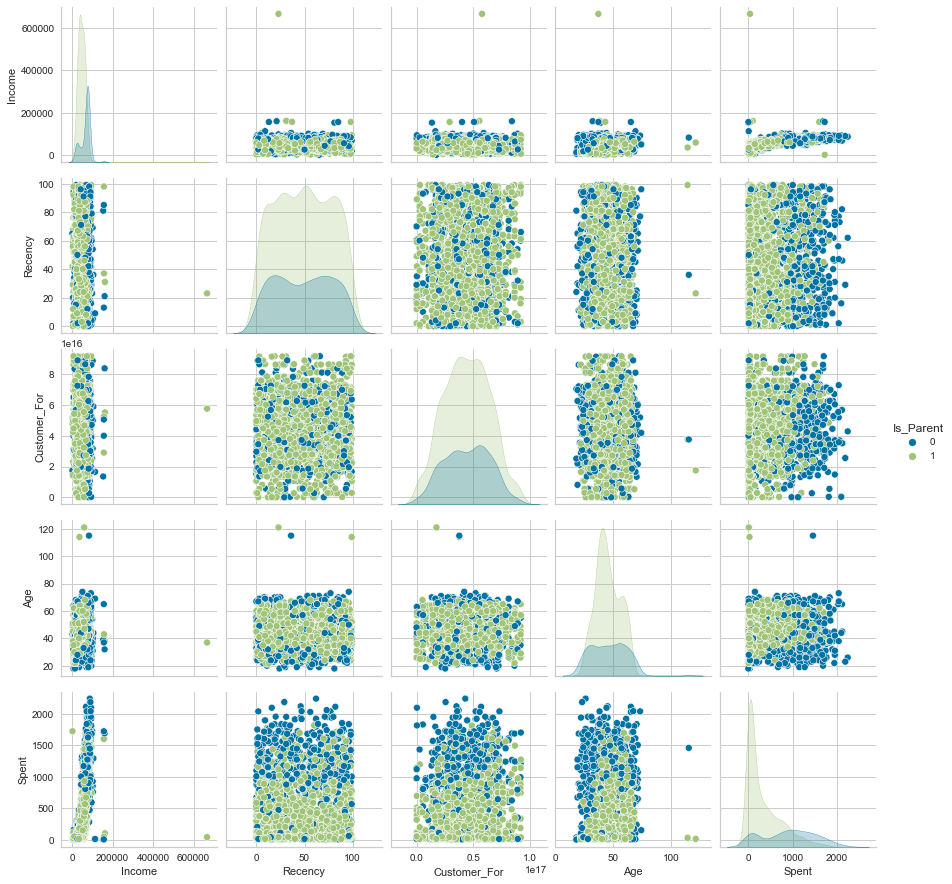

In [213]:
to_plot = ['Income', 'Recency', 'Customer_For', 'Age', 'Spent', 'Is_Parent']

sns.pairplot(data[to_plot], hue='Is_Parent')
plt.show()

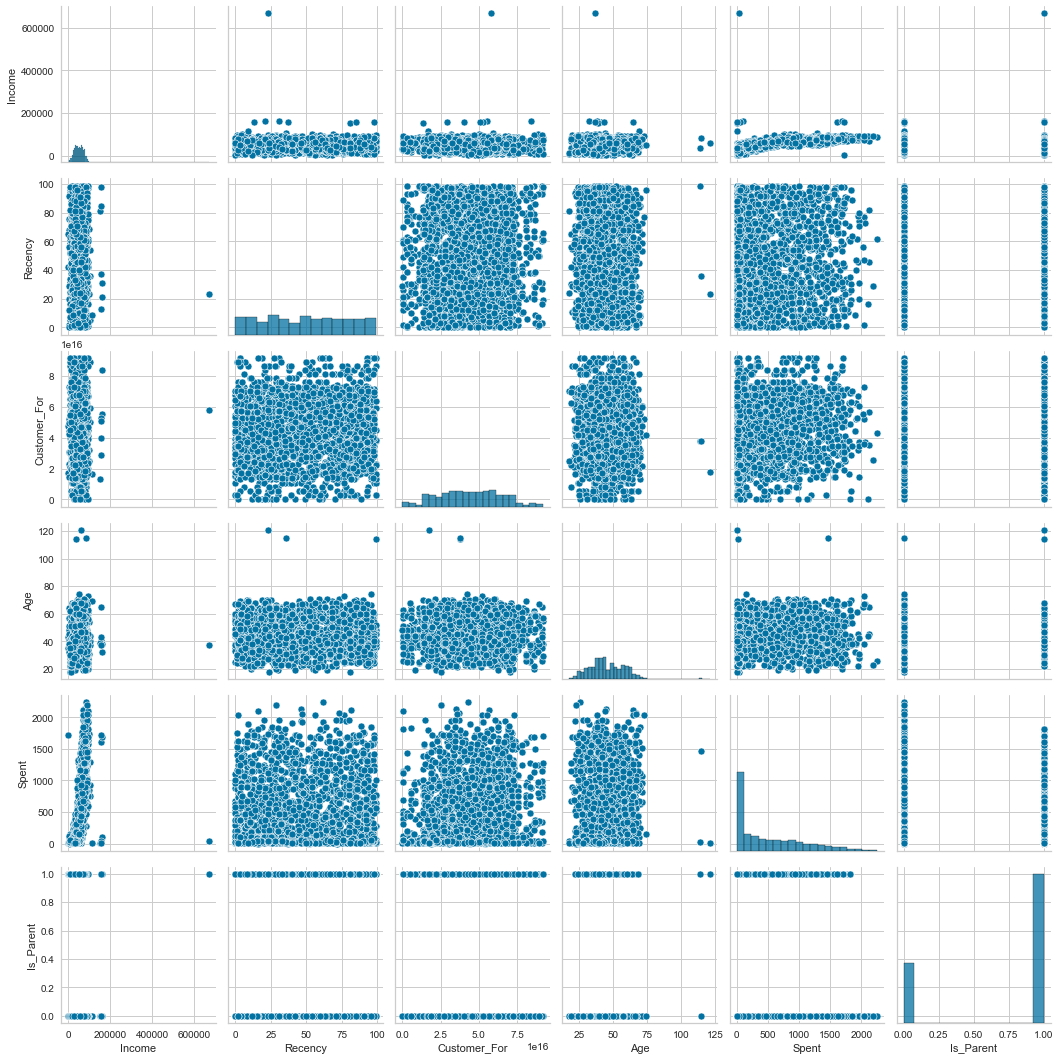

In [214]:
sns.pairplot(data[to_plot])
plt.show()

Удалим некоторые выбросы по возрасту `Age` и по заработку `Income`. Удалим покупателей старше 90 лет и зарабатывающий более 600000$.

In [215]:
data = data[(data['Age'] < 90)]
data = data[(data['Income'] < 600000)]
print(f'Количество объектов после удаления выбросов: {data.shape[0]}')

Количество объектов после удаления выбросов: 2212


### Коррелялицоный анализ

Посмотрим на корреляцию между численными признаками

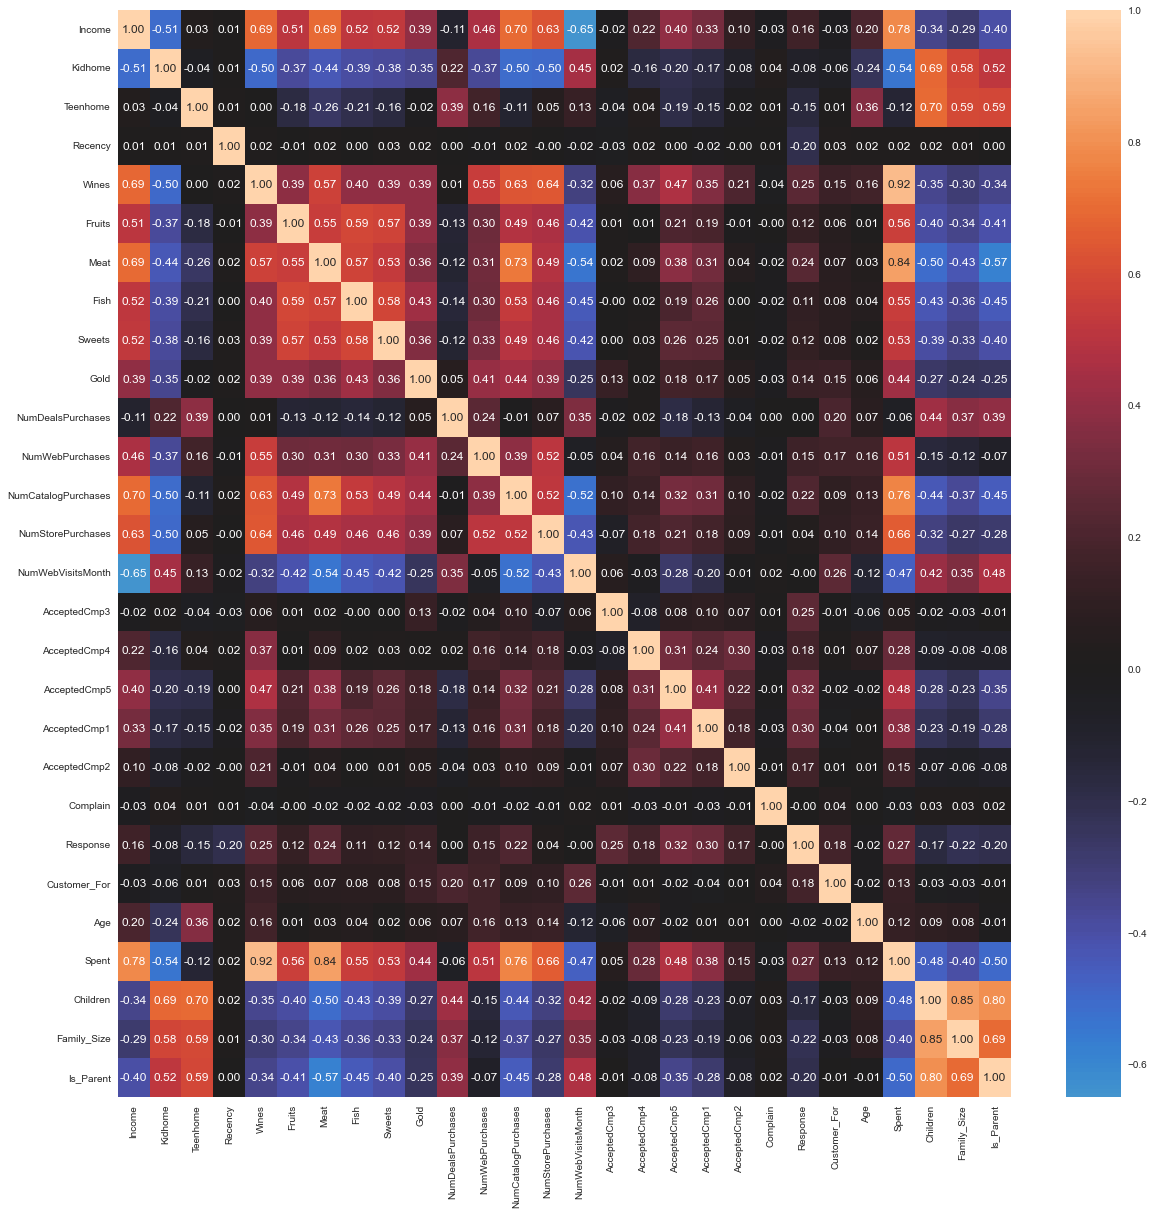

In [216]:
plt.figure(figsize=(20, 20))  
sns.heatmap(data.corr(), fmt='.2f', annot=True, center=0)
plt.show()

### Кодирование признаков

Закодируем категориальные признаки. Так как у нас их мало (`Education` и `Living_With`), можем использовать смело `LabelEncoder()`

In [217]:
data['Education'].value_counts()

Graduate         1115
Postgraduate      845
Undergraduate     252
Name: Education, dtype: int64

In [218]:
data['Living_With'].value_counts()

Partner    1428
Alone       784
Name: Living_With, dtype: int64

LabelEncoder в данном случае работает как OrdinalEncoding.

И вообще LabelEncoder предназначен для трансформирования целевого признака y из строкового в числовой вид.

А Education, Living_With -  это категориальные номинальные признаки, а не порядковые, и их нужно кодировать как OneHotEncoder т.к. количество категорий небольшое.

In [219]:
LE = LabelEncoder()
data['Education'] = LE.fit_transform(data['Education'])
data['Living_With'] = LE.fit_transform(data['Living_With'])

Вот правильное кодирование для номинальных категориальных признаков

In [220]:
# data = pd.get_dummies(data, columns=['Education', 'Living_With'])

In [225]:
# сделаем копию данных
ds = data.copy()

# удалим бинарные признаки
cols_del = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']
ds.drop(cols_del, axis=1, inplace=True)

# Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns=ds.columns)

In [226]:
# Посмотрим на датасет, который будем использовать для дальнейшей кластеризации
scaled_ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.478249,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.922325,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.198327,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.889703,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.315945,0.740959,0.069987,0.449070,0.632456


### Снижение размерности



Будем использовать PCA, снизим размерность до 3, что бы можно было визуализировать результаты кластеризации. Подобно `StandardScaler()` можем вызвать методы `fit()`, `transform()` и их суперпозицию `fit_tranform()`

In [230]:
pca = PCA(n_components=3)
PCA_ds = pd.DataFrame(pca.fit_transform(scaled_ds), columns=(['col1', 'col2', 'col3']))
PCA_ds.describe().T # T для транспонирования таблицы, замены местами строк и столбцов

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,1.027910e-16,2.866342,-5.969955,-2.532056,-0.772369,2.380250,7.406397
col2,2212.0,6.424437e-18,1.707780,-4.306409,-1.332164,-0.163556,1.236408,6.169581
col3,2212.0,4.095579e-17,1.221527,-3.565984,-0.831512,-0.026556,0.814513,6.642462


Разобьем колонки по осям для визуализации:

In [231]:
x, y, z = PCA_ds['col1'], PCA_ds['col2'], PCA_ds['col3']

 Теперь мы можем визуализировать полученные ранее данные, что бы понять, сколько кластеров мы имеем в данных

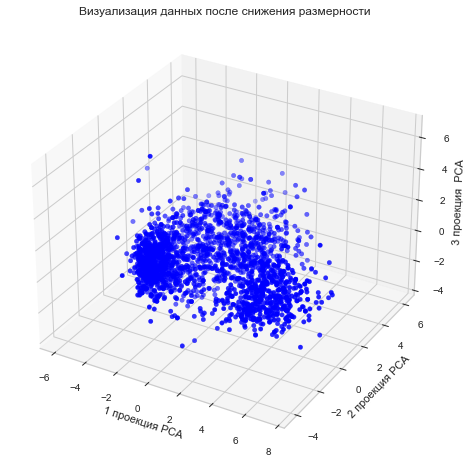

In [232]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='blue', marker='o')
ax.set_title('Визуализация данных после снижения размерности')
ax.set_xlabel('1 проекция PCA')
ax.set_ylabel('2 проекция PCA')
ax.set_zlabel('3 проекция  PCA')
plt.show()

### Построение модели кластеризации

Как мы знаем, методу `k-means` на вход необходимо подать количество кластеров. Но дело в том, что нередко, например как в данной задаче, истинное количество кластеров попросту неизвестно. Для этого нам поможет `Elbow Method`. `Distortion score` есть квадрат расстояния от точки до ее центра кластера. Оптимальным на графике ниже количество кластеров считается, если после него `distortion score` падает практически линейно.

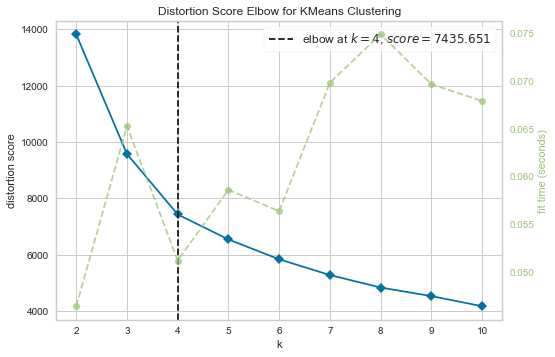

In [235]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show();

Как видно из графика, 4 оптимальное количество кластеров для нашей задачи. Обучим модель на 4-х кластерах.

In [236]:
model = KMeans(n_clusters=4)
y_pred = model.fit_predict(PCA_ds)
PCA_ds['Clusters'] = y_pred
data['Clusters']= y_pred

Посмотрим на визуализацию кластеров:

In [237]:
pal = ['y', 'g', 'b', 'r']
cmap = colors.ListedColormap(['y', 'g', 'b', 'r'])

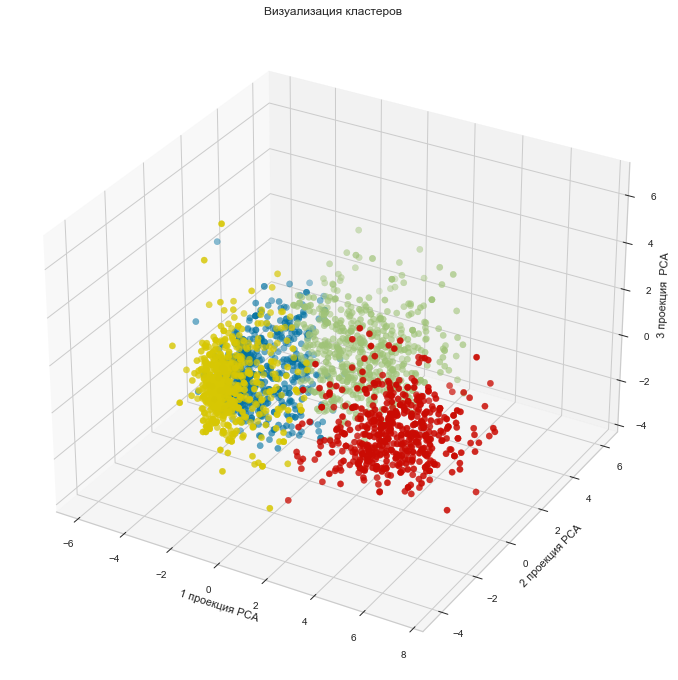

In [239]:
fig = plt.figure(figsize=(14, 12))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=PCA_ds['Clusters'], cmap=cmap, marker='o')
ax.set_title('Визуализация кластеров')
ax.set_xlabel('1 проекция PCA')
ax.set_ylabel('2 проекция PCA')
ax.set_zlabel('3 проекция  PCA')
plt.show()

### Анализ результатов кластеризации


Самая важная часть после кластеризации - интерпретировать схожесть объектов в каждом из кластеров, оценить распределения.

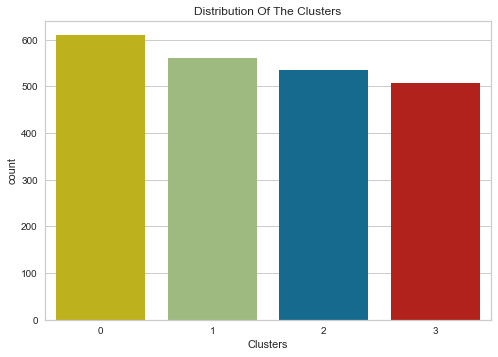

In [241]:
pl = sns.countplot(x=data['Clusters'], palette=pal)
pl.set_title('Distribution Of The Clusters')
plt.show()

Разбиения кластеров приблизительно равны, это хорошо, посмотрим на траты и заработок:

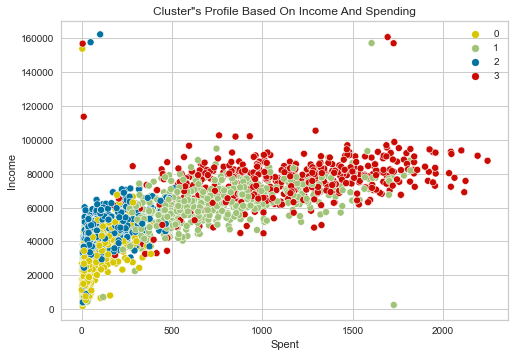

In [242]:
pl = sns.scatterplot(data=data, x=data['Spent'], y=data['Income'], hue=data['Clusters'], palette=pal)
pl.set_title('Cluster"s Profile Based On Income And Spending')
plt.legend()
plt.show()

**Доходы и расходы по группам**
* Группа 0: много тратят и средний доход 
* Группа 1: очень мало тратят и низкий доход
* Группа 2: очень много тратят и высокий доход
* Группа 3: мало тратят & средний доход

Для подтверждения посмотрим на ящики с усами от трат:


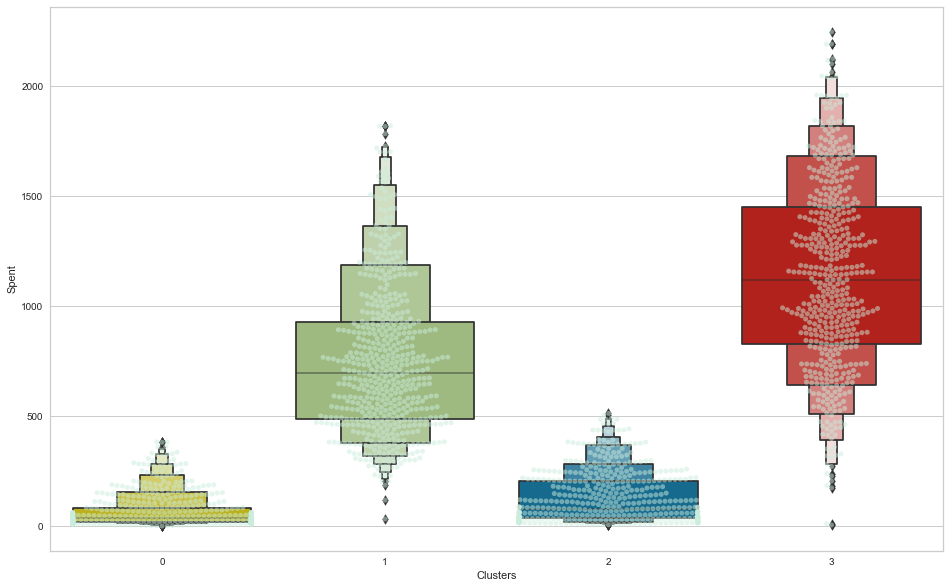

In [245]:
fig = plt.figure(figsize=(16, 10))
pl=sns.swarmplot(x=data['Clusters'], y=data['Spent'], color= '#CBEDDD', alpha=0.5 )
pl=sns.boxenplot(x=data['Clusters'], y=data['Spent'], palette=pal)
plt.show()


Таким образом, мы можем выделить, что больше всех тратит группа в которой больше всего заработок.


### Самостоятельная работа
В качестве самостоятельного задания слушателям предлагается уточнить портрет из каждого кластера, посмотрев на распределения по:
1. количеству детей
2. размеру семьи
3. возрасту 

In [274]:
by_cluster = data.pivot_table(index='Clusters', 
                              values=['Children', 
                                      'Family_Size', 
                                      'Age'], 
                              aggfunc='mean').round(2)
by_cluster

,Age,Children,Family_Size
Clusters,,,
0,37.58,0.79,2.40
1,48.37,1.14,2.81
2,49.44,1.80,3.53
3,45.91,0.03,1.61


In [276]:
import plotly.express as px

In [291]:
fig = px.bar(by_cluster, y='Age',
                 height=500,
                 width=700,
                 title='Средний возраст')

fig.update_layout(legend_orientation='h',
                  legend=dict(x=.5, xanchor='center'),
                  hovermode='x',
                  margin=dict(l=0, r=10, t=40, b=0))

fig.show()

In [292]:
fig = px.bar(by_cluster, y='Children',
                 height=500,
                 width=700,
                 title='Среднее количество детей')

fig.update_layout(legend_orientation='h',
                  legend=dict(x=.5, xanchor='center'),
                  hovermode='x',
                  margin=dict(l=0, r=10, t=40, b=0))

fig.show()

In [293]:
fig = px.bar(by_cluster, y='Family_Size',
                 height=500,
                 width=700,
                 title='Средний размер семьи')

fig.update_layout(legend_orientation='h',
                  legend=dict(x=.5, xanchor='center'),
                  hovermode='x',
                  margin=dict(l=0, r=10, t=40, b=0))

fig.show()